In [7]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload() 
iris= pd.read_csv(io.BytesIO(uploaded["iris.data"]))

Saving iris.data to iris (1).data


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
iris.sample(5)

,sepal length,sepal width,petal length,petal width,class
23,5.1,3.3,1.7,0.5,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica
84,5.4,3.0,4.5,1.5,Iris-versicolor


In [74]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [73]:
iris_copy = iris.groupby('class')
iris_copy.describe()

sepal length                        ... petal width               
                       count   mean       std  min  ...         25%  50%  75%  max
class                                               ...                           
Iris-setosa             50.0  5.006  0.352490  4.3  ...         0.2  0.2  0.3  0.6
Iris-versicolor         50.0  5.936  0.516171  4.9  ...         1.2  1.3  1.5  1.8
Iris-virginica          50.0  6.588  0.635880  4.9  ...         1.8  2.0  2.3  2.5

[3 rows x 32 columns]

In [9]:
iris.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.shape

(150, 5)

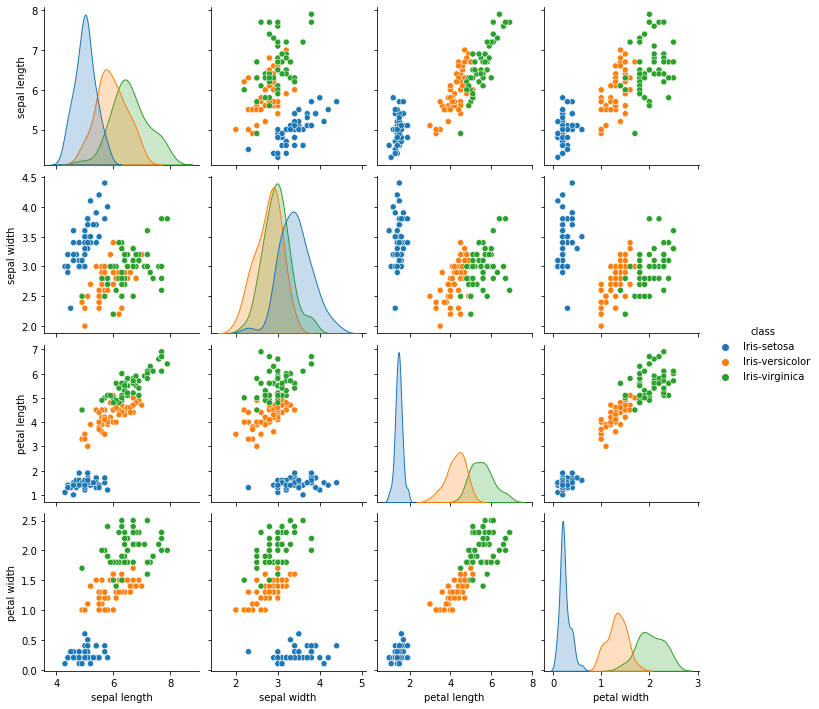

In [13]:
sns.pairplot(data=iris, hue = 'class')

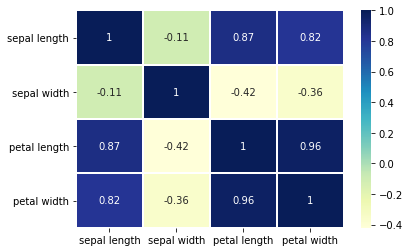

In [25]:
sns.heatmap(iris.corr(),cmap="YlGnBu",annot=True,linewidths=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59814ea650>,
      dtype=object)

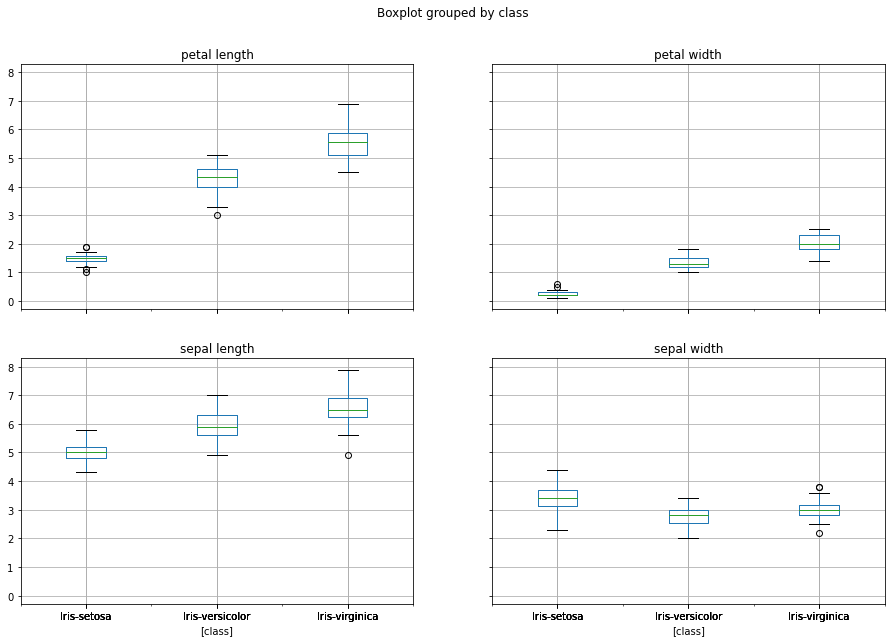

In [89]:

iris.boxplot(by='class',figsize=(15, 10))

In [27]:
# defining features and labels
X =iris.drop('class',axis=1)
y= iris['class']

In [31]:
from sklearn.preprocessing import LabelEncoder
c2n= LabelEncoder()
y = c2n.fit_transform(y)
y[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4,shuffle=True)

In [48]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))
print('Shape of X training set {}'.format(X_test.shape),'&',' Size of Y training set {}'.format(y_test.shape))

Shape of X training set (112, 4) &  Size of Y training set (112,)
Shape of X training set (38, 4) &  Size of Y training set (38,)


In [49]:
from sklearn.tree import DecisionTreeClassifier
classTree = DecisionTreeClassifier()
classTree.fit(X_train,y_train)
predTree = classTree.predict(X_test)
predTree

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [50]:
pd.DataFrame({'Actual':y_test, 'Predicted':predTree})

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
5,1,1
6,1,2
7,0,0
8,0,0
9,2,2


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, predTree))
print("\n Classification report: \n")
print(classification_report(y_test, predTree))

Confusion Matrix: 

[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]

 Classification report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



Text(0.5, 1.0, "Decision Tree of Iris's Species")

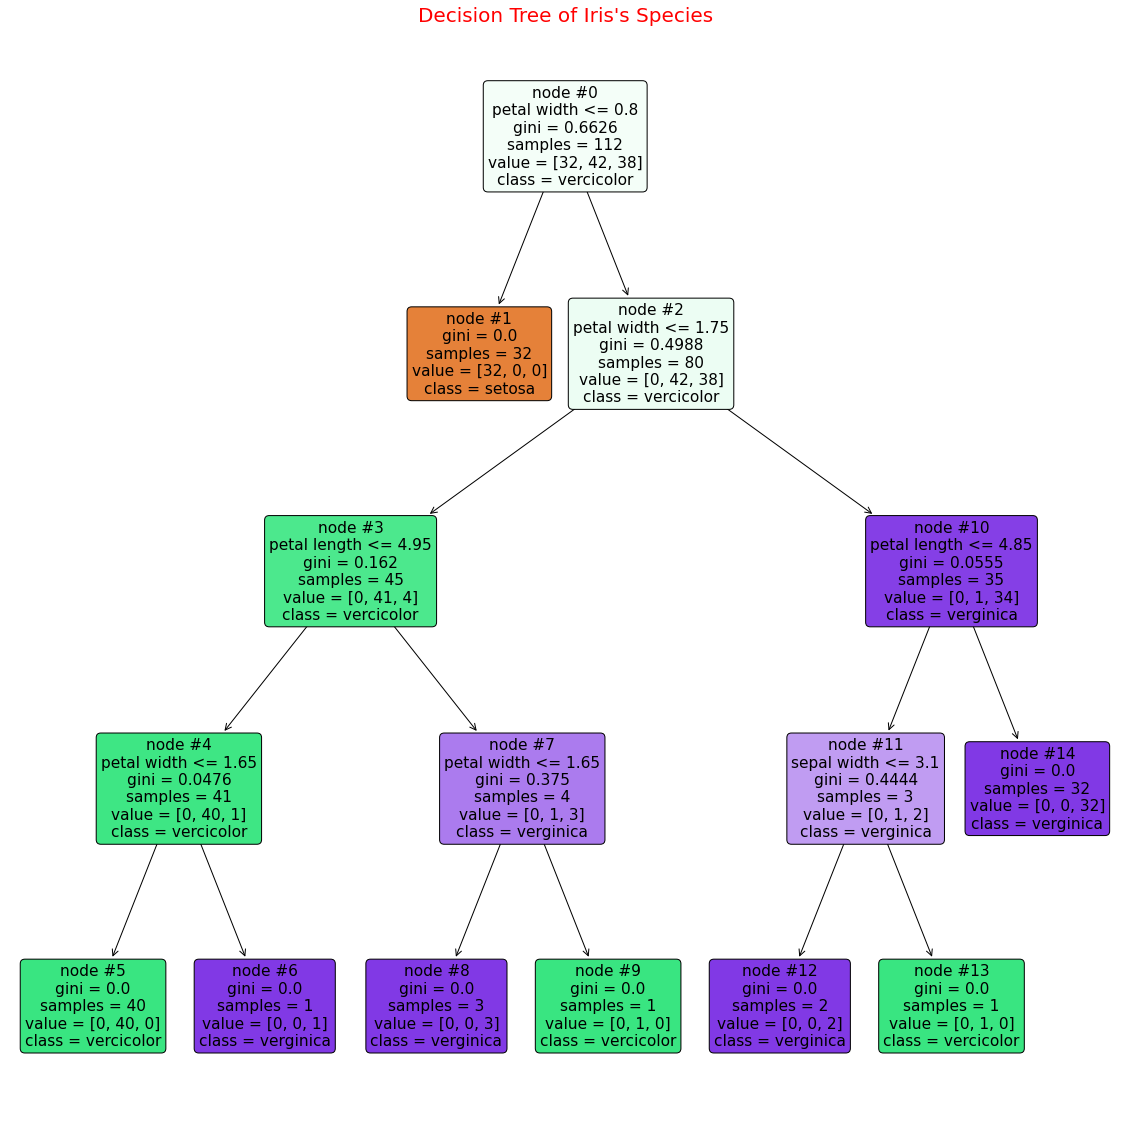

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=classTree, feature_names = X.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True,node_ids=True)
plt.title("Decision Tree of Iris's Species",fontsize=20,color="red")